In [219]:
import pandas as pd
import numerapi
import matplotlib.pyplot as plt

In [220]:
my_models = [f'tutmodel{i}' for i in range(0,34)] + ['tutmodel', 'mrquantsalot']

In [221]:
napi = numerapi.NumerAPI()
dfs = []
for model in my_models:
    data = napi.round_model_performances(model)
    df = pd.DataFrame.from_records(data)
    df = df[df['roundResolved'] & df['corr'].notna()]
    df['model'] = model
    dfs.append(df)


In [222]:
df = pd.concat(dfs).reset_index(drop=True).dropna(how='all', axis=1)
df.drop(inplace=True, columns=['payout','corrMultiplier','roundOpenTime','roundPayoutFactor','roundResolveTime','roundResolveTime','mmcMultiplier','roundResolved','selectedStakeValue'])
df = df[df['corr'].notna()]
df['2_tc_1_corr'] = df['corr'] + 2 * df['tc']
df['1_tc_1_corr'] = df['corr'] + df['tc']
df['2_tc_0_corr'] = 2 * df['tc']
latest_round = df['roundNumber'].max()

,corr,corrPercentile,corrWMetamodel,fnc,fncPercentile,fncV3,fncV3Percentile,mmc,mmcPercentile,roundNumber,tc,tcPercentile,model
0,0.025490,0.367262,0.587556,0.023215,0.626859,0.028931,0.653286,-0.004252,0.330836,321,-0.030628,0.250613,tutmodel0
1,0.050454,0.737523,0.612715,0.030789,0.773924,0.022839,0.621541,0.013404,0.792010,320,0.107215,0.944060,tutmodel0
2,0.045414,0.874598,0.605876,0.035104,0.788276,0.022968,0.670857,0.020801,0.887816,319,-0.004594,0.606538,tutmodel0
3,0.043199,0.755766,0.608890,0.032061,0.689029,0.024156,0.584225,0.013020,0.770050,318,-0.014117,0.325648,tutmodel0
4,0.012978,0.396297,0.611089,0.000343,0.306890,0.008056,0.440471,-0.006674,0.342629,317,-0.073198,0.111085,tutmodel0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.070240,0.746505,0.911931,0.048264,0.762090,NaN,NaN,-0.001076,0.348843,258,0.003158,0.505051,mrquantsalot
1396,0.140820,0.791325,0.908817,0.041419,0.721928,NaN,NaN,0.003051,0.449639,257,0.035962,0.788955,mrquantsalot
1397,0.071258,0.586350,0.915841,0.023828,0.411890,NaN,NaN,-0.008115,0.152966,256,0.005245,0.548559,mrquantsalot
1398,0.097395,0.895136,0.917742,0.044602,0.942486,NaN,NaN,0.004810,0.604092,255,NaN,NaN,mrquantsalot


In [250]:
def get_best_models(df: pd.DataFrame, var: str, n_rounds: int=52):
    """Returns the best models ranked by mean var over the previous resolved n_rounds"""
    return df[df['roundNumber'] >= latest_round - n_rounds].groupby('model')[var].mean().sort_values(ascending=False)

get_best_models(df, 'tc').tail()

model
tutmodel30   -0.014559
tutmodel29   -0.014856
tutmodel15   -0.017279
tutmodel14   -0.019882
tutmodel13   -0.023426
Name: tc, dtype: float64

In [240]:
get_best_models(df, '2_tc_1_corr', 26).head()

model
tutmodel9     0.054205
tutmodel5     0.048521
tutmodel6     0.047665
tutmodel8     0.044655
tutmodel19    0.041591
Name: 2_tc_1_corr, dtype: float64

In [225]:
get_best_models(df, '2_tc_1_corr').head()

model
tutmodel9     0.050011
tutmodel8     0.043172
tutmodel5     0.039783
tutmodel7     0.039263
tutmodel19    0.037219
Name: 2_tc_1_corr, dtype: float64

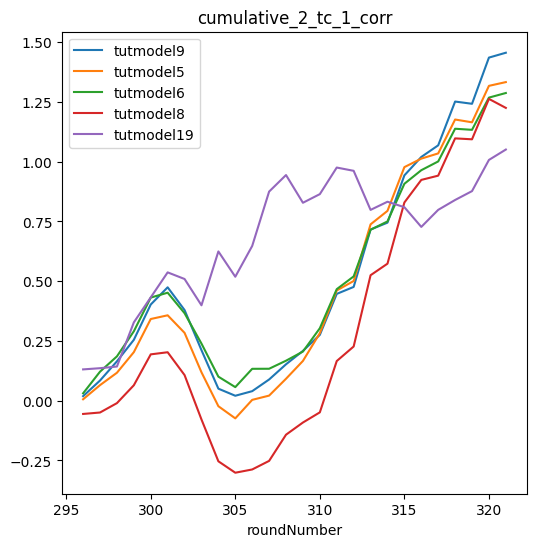

In [257]:
def plot_models(df: pd.DataFrame, model_names: list[str], metric: str = '2_tc_1_corr', n_rounds: int = 52):
    def custom_plot(df: pd.DataFrame, model_name: str, metric, n_rounds, cumulative):
        change_df = df[df['model'] == model_name].sort_values('roundNumber')[['roundNumber', metric]]
        change_df = change_df.set_index('roundNumber')
        change_df = change_df.fillna(0.0)
        change_df = change_df.iloc[-n_rounds:]
        change_df[f'cumulative_{metric}'] = change_df[metric].cumsum()
        change_df[f'cumulative_{metric}'].plot(label=model_name)
        plt.title(f'cumulative_{metric}')

    for model in model_names:
        custom_plot(df, model, metric, n_rounds, cumulative=True)
    plt.legend(model_names)
    plt.show()

plot_models(df, get_best_models(df, '2_tc_1_corr', n_rounds=26).head().index, n_rounds=26)

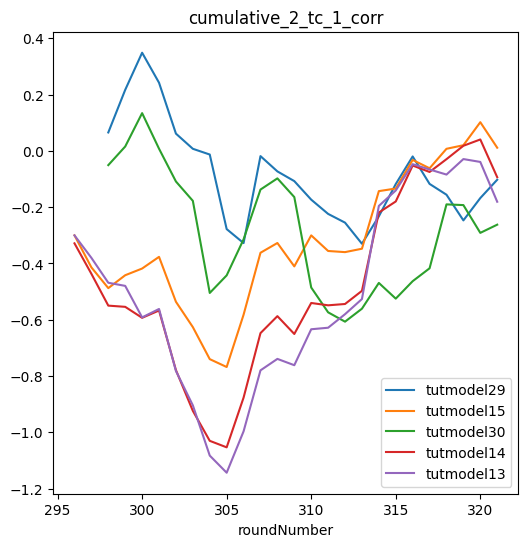

In [259]:
plot_models(df, get_best_models(df, '2_tc_1_corr', n_rounds=26).tail().index, n_rounds=26)